In [5]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, auc, roc_curve

In [6]:
y_df = pd.read_csv('../../data/model_results.csv')

In [7]:
# Have a look at different cutoffs for weekly eligible subs
y_w_e = y_df[y_df['group']=='weekly-eligible']

In [10]:
# establish the baseline
cm_dt = confusion_matrix(y_w_e.success, y_w_e.predict)
print(cm_dt)
print('Accuracy: %.3f' % accuracy_score(y_w_e.success, y_w_e.predict))
print('Precision: %.3f' % precision_score(y_w_e.success, y_w_e.predict))
print('Recall: %.3f' % recall_score(y_w_e.success, y_w_e.predict))
print('F1 Score: %.3f' % f1_score(y_w_e.success, y_w_e.predict))

fpr, tpr, thresholds = roc_curve(y_w_e.success, y_w_e.predict)
week_auc = auc(fpr, tpr)
print('AUC: %.3f' % week_auc)

[[4747 3081]
 [2584 3829]]
Accuracy: 0.602
Precision: 0.554
Recall: 0.597
F1 Score: 0.575
AUC: 0.602


In [11]:
values = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]

# loop through and try cutoffs at different prediction values.
for x in values:
    print('---------------------------')
    print('Now Checking:', x)
    y_w_e['pred_v2'] = 0
    y_w_e['pred_v2'][y_w_e['probs']<x] = 1
    cm_dt = confusion_matrix(y_w_e.success, y_w_e.pred_v2)
    print(cm_dt)
    print('Accuracy: %.3f' % accuracy_score(y_w_e.success, y_w_e.pred_v2))
    print('Precision: %.3f' % precision_score(y_w_e.success, y_w_e.pred_v2))
    print('Recall: %.3f' % recall_score(y_w_e.success, y_w_e.pred_v2))
    print('F1 Score: %.3f' % f1_score(y_w_e.success, y_w_e.pred_v2))
    
    fpr, tpr, thresholds = roc_curve(y_w_e.success, y_w_e.pred_v2)
    week_auc = auc(fpr, tpr)
    print('AUC: %.3f' % week_auc)
    print('                        ')

---------------------------
Now Checking: 0.05
[[7804   24]
 [6406    7]]
Accuracy: 0.548
Precision: 0.226
Recall: 0.001
F1 Score: 0.002
AUC: 0.499
                        
---------------------------
Now Checking: 0.1
[[7745   83]
 [6397   16]]
Accuracy: 0.545
Precision: 0.162
Recall: 0.002
F1 Score: 0.005
AUC: 0.496
                        
---------------------------
Now Checking: 0.15
[[7465  363]
 [6343   70]]
Accuracy: 0.529
Precision: 0.162
Recall: 0.011
F1 Score: 0.020
AUC: 0.482
                        
---------------------------
Now Checking: 0.2
[[7458  370]
 [6341   72]]
Accuracy: 0.529
Precision: 0.163
Recall: 0.011
F1 Score: 0.021
AUC: 0.482
                        
---------------------------
Now Checking: 0.25
[[7285  543]
 [6275  138]]
Accuracy: 0.521
Precision: 0.203
Recall: 0.022
F1 Score: 0.039
AUC: 0.476
                        
---------------------------
Now Checking: 0.3
[[6664 1164]
 [6028  385]]
Accuracy: 0.495
Precision: 0.249
Recall: 0.060
F1 Score: 0.097
A

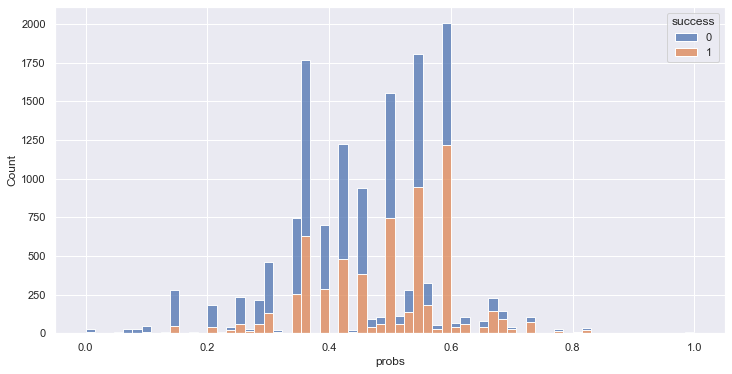

In [12]:
sns.set(rc = {'figure.figsize':(12,6)})
mygraph = sns.histplot(data=y_w_e, x="probs", hue="success", multiple="stack")

<AxesSubplot:xlabel='bin'>

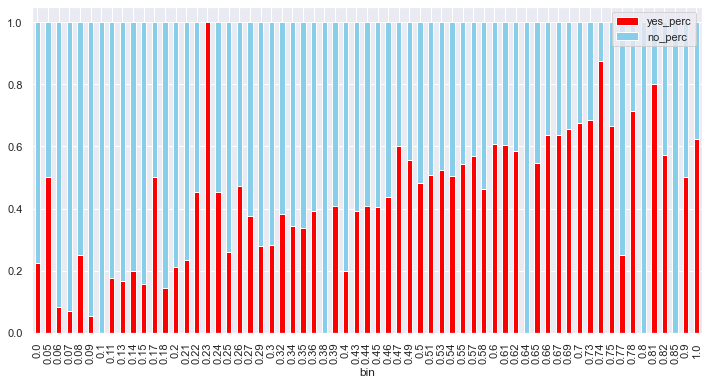

In [15]:
y_w_e['bin'] = y_w_e['probs'].round(2)

y_w_e_binned = y_w_e.groupby('bin').agg(trial_count = pd.NamedAgg(column='success', aggfunc='count'),
                                trial_success = pd.NamedAgg(column='success', aggfunc='sum')).reset_index()

y_w_e_binned['yes_perc'] = y_w_e_binned['trial_success'] / y_w_e_binned['trial_count']
y_w_e_binned['no_perc'] = 1 - (y_w_e_binned['trial_success'] / y_w_e_binned['trial_count'])

y_w_e_binned_small = y_w_e_binned[['bin','yes_perc','no_perc']]
y_w_e_binned_small = y_w_e_binned_small.set_index('bin')

y_w_e_binned_small.plot(kind='bar', stacked=True, color=['red', 'skyblue'], figsize=(12,6))

In [ ]:
# There's no clear cutoff.  it could do a little better with a .45 cutoff perhaps?

# lets look at monthly which has far more subs.

In [16]:
# Have a look at different cutoffs for weekly eligible subs
y_m_e = y_df[y_df['group']=='monthly-eligible']

In [17]:
# establish the baseline
cm_dt = confusion_matrix(y_m_e.success, y_m_e.predict)
print(cm_dt)
print('Accuracy: %.3f' % accuracy_score(y_m_e.success, y_m_e.predict))
print('Precision: %.3f' % precision_score(y_m_e.success, y_m_e.predict))
print('Recall: %.3f' % recall_score(y_m_e.success, y_m_e.predict))
print('F1 Score: %.3f' % f1_score(y_m_e.success, y_m_e.predict))

fpr, tpr, thresholds = roc_curve(y_m_e.success, y_m_e.predict)
week_auc = auc(fpr, tpr)
print('AUC: %.3f' % week_auc)

[[24675  1234]
 [13644  2053]]
Accuracy: 0.642
Precision: 0.625
Recall: 0.131
F1 Score: 0.216
AUC: 0.542


In [18]:
values = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]

# loop through and try cutoffs at different prediction values.
for x in values:
    print('---------------------------')
    print('Now Checking:', x)
    y_m_e['pred_v2'] = 0
    y_m_e['pred_v2'][y_m_e['probs']<x] = 1
    cm_dt = confusion_matrix(y_m_e.success, y_m_e.pred_v2)
    print(cm_dt)
    print('Accuracy: %.3f' % accuracy_score(y_m_e.success, y_m_e.pred_v2))
    print('Precision: %.3f' % precision_score(y_m_e.success, y_m_e.pred_v2))
    print('Recall: %.3f' % recall_score(y_m_e.success, y_m_e.pred_v2))
    print('F1 Score: %.3f' % f1_score(y_m_e.success, y_m_e.pred_v2))
    
    fpr, tpr, thresholds = roc_curve(y_m_e.success, y_m_e.pred_v2)
    week_auc = auc(fpr, tpr)
    print('AUC: %.3f' % week_auc)
    print('                        ')

---------------------------
Now Checking: 0.05
[[25909     0]
 [15697     0]]
Accuracy: 0.623
Precision: 0.000
Recall: 0.000
F1 Score: 0.000
AUC: 0.500
                        
---------------------------
Now Checking: 0.1
[[25909     0]
 [15697     0]]
Accuracy: 0.623
Precision: 0.000
Recall: 0.000
F1 Score: 0.000
AUC: 0.500
                        
---------------------------
Now Checking: 0.15
[[25909     0]
 [15697     0]]
Accuracy: 0.623
Precision: 0.000
Recall: 0.000
F1 Score: 0.000
AUC: 0.500
                        
---------------------------
Now Checking: 0.2
[[25190   719]
 [15570   127]]
Accuracy: 0.608


/Users/travisstowe/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/travisstowe/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/travisstowe/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.150
Recall: 0.008
F1 Score: 0.015
AUC: 0.490
                        
---------------------------
Now Checking: 0.25
[[23543  2366]
 [15132   565]]
Accuracy: 0.579
Precision: 0.193
Recall: 0.036
F1 Score: 0.061
AUC: 0.472
                        
---------------------------
Now Checking: 0.3
[[19281  6628]
 [13873  1824]]
Accuracy: 0.507
Precision: 0.216
Recall: 0.116
F1 Score: 0.151
AUC: 0.430
                        
---------------------------
Now Checking: 0.35
[[14375 11534]
 [11814  3883]]
Accuracy: 0.439
Precision: 0.252
Recall: 0.247
F1 Score: 0.250
AUC: 0.401
                        
---------------------------
Now Checking: 0.4
[[ 8895 17014]
 [ 8545  7152]]
Accuracy: 0.386
Precision: 0.296
Recall: 0.456
F1 Score: 0.359
AUC: 0.399
                        
---------------------------
Now Checking: 0.45
[[ 4075 21834]
 [ 4993 10704]]
Accuracy: 0.355
Precision: 0.329
Recall: 0.682
F1 Score: 0.444
AUC: 0.420
                        
---------------------------
Now Ch

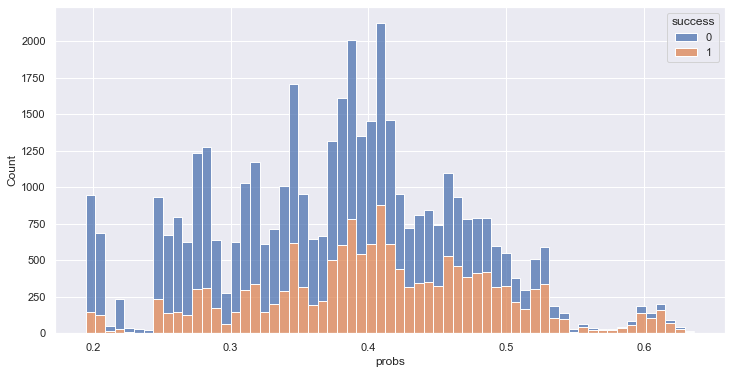

In [19]:
sns.set(rc = {'figure.figsize':(12,6)})
mygraph = sns.histplot(data=y_m_e, x="probs", hue="success", multiple="stack")

In [ ]:
# If we lowered the yes value to .35 we'd capture a lot more of the true positives.  but we'd get a lot more false positives as well.

<AxesSubplot:xlabel='bin'>

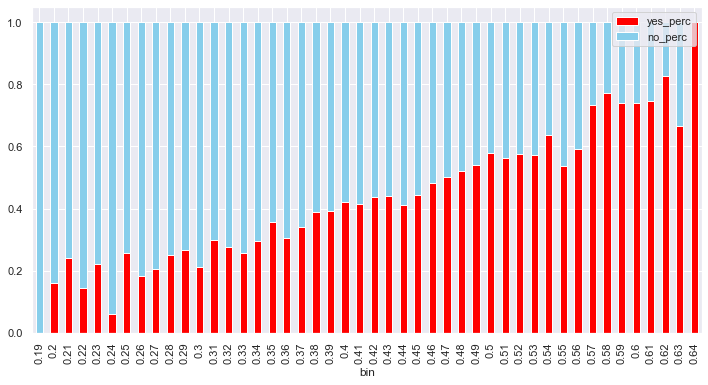

In [20]:
y_m_e['bin'] = y_m_e['probs'].round(2)

y_m_e_binned = y_m_e.groupby('bin').agg(trial_count = pd.NamedAgg(column='success', aggfunc='count'),
                                trial_success = pd.NamedAgg(column='success', aggfunc='sum')).reset_index()

y_m_e_binned['yes_perc'] = y_m_e_binned['trial_success'] / y_m_e_binned['trial_count']
y_m_e_binned['no_perc'] = 1 - (y_m_e_binned['trial_success'] / y_m_e_binned['trial_count'])

y_m_e_binned_small = y_m_e_binned[['bin','yes_perc','no_perc']]
y_m_e_binned_small = y_m_e_binned_small.set_index('bin')

y_m_e_binned_small.plot(kind='bar', stacked=True, color=['red', 'skyblue'], figsize=(12,6))

In [ ]:
# Changing the cutoff doesn't feel like it will work for this either.  Stealing from peter to pay paul.